<a href="https://colab.research.google.com/github/nhitheknee/Machine-Learning/blob/main/Multilayer_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

11501568/11490434 [==============================] - 0s 0us/step


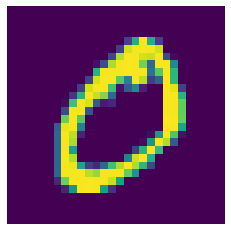

In [ ]:
# Load dataset and print shapes of train sets and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Plot a set of data to test
some_digit = x_train[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)
plt.axis("off")

plt.show()

In [ ]:
# Flatten and normalize data
x_train = x_train.reshape(x_train.shape[0], 784)
x_train = keras.utils.normalize(x_train, axis=1)
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape(x_test.shape[0], 784)
x_test = keras.utils.normalize(x_test, axis=1)
x_test = x_test.astype('float32') / 255

print(x_train.shape[0], x_train.shape[1])
print(x_test.shape[0], x_test.shape[1])

60000 784
10000 784


In [ ]:
# Represent output as one-hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [ ]:
# Training parameters
batch_size = 128
dropout = 0.45

# Building logistic neural network
def logistic_model():
    model = keras.Sequential()  # create a sequential model

    # Define input and hidden layers
    model.add(keras.layers.Dense(256, input_dim=784))    # input layer (784 nodes)
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(100, activation='relu'))   # hidden layer 1 (100 nodes)
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(100, activation='relu'))   # hidden layer 2 (100 nodes)
    model.add(keras.layers.Dropout(dropout))

    # Define output layer
    model.add(keras.layers.Dense(10, activation='softmax'))   # units (nodes) = 10 for 10 classes

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# Training the data by fitting to the NN
def train_model(model):
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, shuffle=True)

    epochs = history.epoch  # track training progress at each epoch
    hist = history.history

    return epochs, hist

In [ ]:
if __name__ == '__main__':
    my_model = logistic_model()
    epochs, hist = train_model(my_model)

    loss, acc = my_model.evaluate(x_test, y_test, batch_size=batch_size)
    print("\nTest Accuracy: ", (100*acc))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 1.8329 - accuracy: 0.3054
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 1.0399 - accuracy: 0.6318
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.7414 - accuracy: 0.7556
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.6343 - accuracy: 0.8010
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5882 - accuracy: 0.8171
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5495 - accuracy: 0.8335
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5262 - accuracy: 0.8409
Epoch 8/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4977 - accuracy: 0.8512
Epoch 9/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4747 - accuracy: 0.8589
Epoch 10/10
79/79 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8992



Higher accuracy can be obtained by increasing number of epoch (97% accuracy at epoch 50).

In [ ]:
# Classification error

# Reload non-binary dataset
(x_train2, x_train2), (x_test2, y_test2) = mnist.load_data()


corrects, incorrects = my_model.evaluate(x_test, y_test)
print("Classification Error: ", incorrects/(corrects + incorrects))


313/313 [==============================] - 1s 2ms/step - loss: 0.3253 - accuracy: 0.8970
Classification Error:  0.7338792804822923
